In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom as bm

In [2]:
customers = pd.read_csv('Case Study/Aerofit_trademill.csv')

In [3]:
customers.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
customers.shape

(180, 9)

In [6]:
customers.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [7]:
customers.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
df_unique = customers.nunique().reset_index()

In [9]:
df_unique

,index,0
0,Product,3
1,Age,32
2,Gender,2
3,Education,8
4,MaritalStatus,2
5,Usage,6
6,Fitness,5
7,Income,62
8,Miles,37


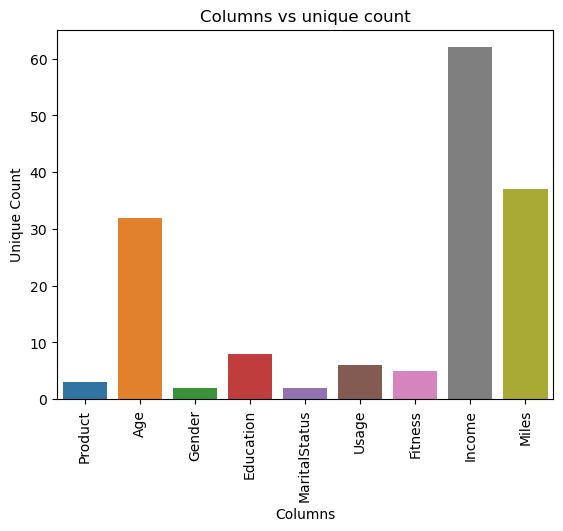

In [10]:
sns.barplot(data = df_unique, x = 'index', y = 0)
plt.title('Columns vs unique count')
plt.xlabel('Columns')
plt.ylabel('Unique Count')
plt.xticks(rotation = 90)
plt.show()

In [11]:
for i in customers.columns:
    print(f'{i} column have below unique values:')
    print(customers[i].unique())

Product column have below unique values:
['KP281' 'KP481' 'KP781']
Age column have below unique values:
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender column have below unique values:
['Male' 'Female']
Education column have below unique values:
[14 15 12 13 16 18 20 21]
MaritalStatus column have below unique values:
['Single' 'Partnered']
Usage column have below unique values:
[3 2 4 5 6 7]
Fitness column have below unique values:
[4 3 2 1 5]
Income column have below unique values:
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles column

In [12]:
for i in customers.dtypes:
    print(i)

object
int64
object
int64
object
int64
int64
int64
int64


In [13]:
for i in customers.columns:
    if customers.dtypes[i] == 'int64':
        print('The minmum and maximum value of '+i+ ' is:'+ str(customers[i].min()) +' and '+ str(customers[i].max()))

The minmum and maximum value of Age is:18 and 50
The minmum and maximum value of Education is:12 and 21
The minmum and maximum value of Usage is:2 and 7
The minmum and maximum value of Fitness is:1 and 5
The minmum and maximum value of Income is:29562 and 104581
The minmum and maximum value of Miles is:21 and 360


In [14]:
customers.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [15]:
customers.duplicated().value_counts()

False    180
Name: count, dtype: int64

### Below analysis is for outlier detection

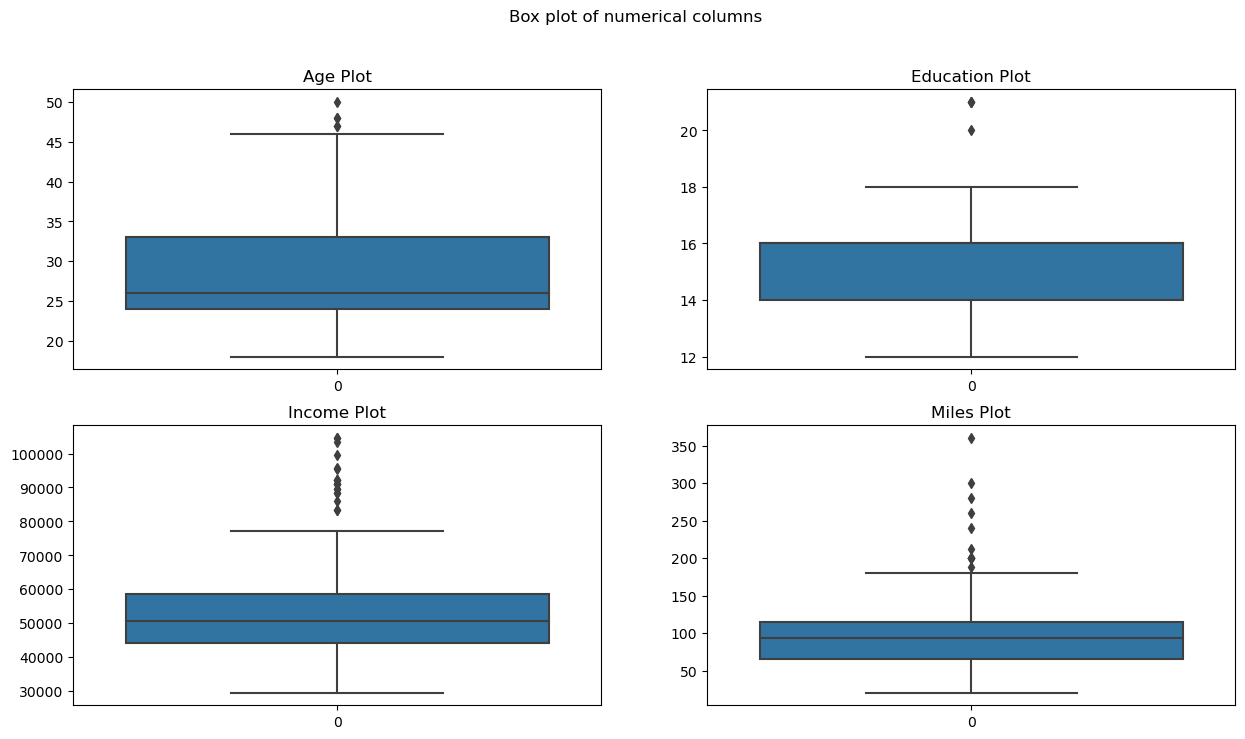

In [16]:
plt.figure(figsize = (15,8))
plt.suptitle('Box plot of numerical columns')

plt.subplot(2,2,1)
sns.boxplot(data = customers['Age'])
plt.title('Age Plot')

plt.subplot(2,2,2)
sns.boxplot(data = customers['Education'])
plt.title('Education Plot')

plt.subplot(2,2,3)
sns.boxplot(data = customers['Income'])
plt.title('Income Plot')

plt.subplot(2,2,4)
sns.boxplot(data = customers['Miles'])
plt.title('Miles Plot')

plt.show()

In [17]:
## Age

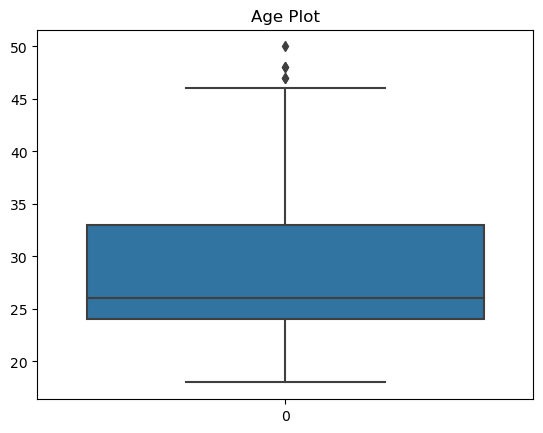

In [18]:
sns.boxplot(data = customers['Age'])
plt.title('Age Plot')
plt.show()

In [19]:
print("Mean/Average: {}".format(customers['Age'].mean()))
print("Median: {}".format(customers['Age'].median()))
print("Mode: {}".format(customers['Age'].mode().values[0]))
print("Standard Deviation: {}".format(customers['Age'].std()))

Mean/Average: 28.788888888888888
Median: 26.0
Mode: 25
Standard Deviation: 6.943498135399795


In [20]:
customers['Age'].quantile(0.25)

24.0

In [21]:
customers['Age'].quantile(0.5)

26.0

In [22]:
customers['Age'].quantile(0.75)

33.0

In [23]:
q1_s= customers['Age'].quantile(0.25)
q3_s= customers['Age'].quantile(0.75)
iqr_s = q3_s-q1_s

In [24]:
print(f'The IQR value is {iqr_s}')

The IQR value is 9.0


In [25]:
q1_s-1.5*iqr_s, q3_s+1.5*iqr_s

(10.5, 46.5)

In [26]:
customers[(customers['Age']<(q1_s-1.5*iqr_s)) | (customers['Age']>(q3_s+1.5*iqr_s)) ]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [27]:
## Education

In [28]:
print("Mean/Average: {}".format(customers['Education'].mean()))
print("Median: {}".format(customers['Education'].median()))
print("Mode: {}".format(customers['Education'].mode().values[0]))
print("Standard Deviation: {}".format(customers['Education'].std()))

Mean/Average: 15.572222222222223
Median: 16.0
Mode: 16
Standard Deviation: 1.6170548978065553


In [29]:
print('The first quantile: '+str(customers['Education'].quantile(0.25)))
print('The second quantile: '+str(customers['Education'].quantile(0.5)))
print('The third quantile: '+str(customers['Education'].quantile(0.75)))

The first quantile: 14.0
The second quantile: 16.0
The third quantile: 16.0


In [30]:
q1_s= customers['Education'].quantile(0.25)
q3_s= customers['Education'].quantile(0.75)
iqr_s = q3_s-q1_s
print(f'The IQR value is {iqr_s}')

The IQR value is 2.0


In [31]:
q1_s-1.5*iqr_s, q3_s+1.5*iqr_s

(11.0, 19.0)

In [32]:
customers[(customers['Education']<(q1_s-1.5*iqr_s)) | (customers['Education']>(q3_s+1.5*iqr_s)) ]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


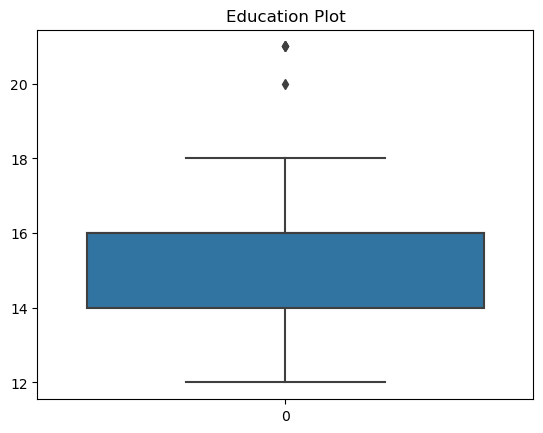

In [33]:
sns.boxplot(data = customers['Education'])
plt.title('Education Plot')
plt.show()

In [34]:
## Usage: The average number of times the customer plans to use the treadmill each week.

In [35]:
#print("Mean/Average: {}".format(customers['Usage'].mean()))
#print("Median: {}".format(customers['Usage'].median()))
#print("Mode: {}".format(customers['Usage'].mode().values[0]))
#print("Standard Deviation: {}".format(customers['Usage'].std()))

In [36]:
#print('The first quantile: '+str(customers['Usage'].quantile(0.25)))
#print('The second quantile: '+str(customers['Usage'].quantile(0.5)))
#print('The third quantile: '+str(customers['Usage'].quantile(0.75)))

In [37]:
#q1_s= customers['Usage'].quantile(0.25)
#q3_s= customers['Usage'].quantile(0.75)
#iqr_s = q3_s-q1_s
#print(f'The IQR value is {iqr_s}')

In [38]:
#q1_s-1.5*iqr_s, q3_s+1.5*iqr_s

In [39]:
#customers[(customers['Usage']<(q1_s-1.5*iqr_s)) | (customers['Usage']>(q3_s+1.5*iqr_s)) ]

In [40]:
#sns.boxplot(data = customers['Usage'])
#plt.title('Usage Plot')
#plt.show()

In [41]:
##Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

In [42]:
#print("Mean/Average: {}".format(customers['Fitness'].mean()))
#print("Median: {}".format(customers['Fitness'].median()))
#print("Mode: {}".format(customers['Fitness'].mode().values[0]))
#print("Standard Deviation: {}".format(customers['Fitness'].std()))

In [43]:
#print('The first quantile: '+str(customers['Fitness'].quantile(0.25)))
#print('The second quantile: '+str(customers['Fitness'].quantile(0.5)))
#print('The third quantile: '+str(customers['Fitness'].quantile(0.75)))

In [44]:
#q1_s= customers['Fitness'].quantile(0.25)
#q3_s= customers['Fitness'].quantile(0.75)
#iqr_s = q3_s-q1_s
#print(f'The IQR value is {iqr_s}')

In [45]:
#q1_s-1.5*iqr_s, q3_s+1.5*iqr_s

In [46]:
#customers[(customers['Fitness']<(q1_s-1.5*iqr_s)) | (customers['Fitness']>(q3_s+1.5*iqr_s)) ]

In [47]:
#sns.boxplot(data = customers['Fitness'])
#plt.title('Fitness Plot')
#plt.show()

In [48]:
## Income: Annual income (in $)

In [49]:
print('Minimum income: '+str(customers['Income'].min())+ ' and Maximum income: '+str(customers['Income'].max()))
print("Mean/Average: {}".format(customers['Income'].mean()))
print("Median: {}".format(customers['Income'].median()))
print("Mode: {}".format(customers['Income'].mode().values[0]))
print("Standard Deviation: {}".format(customers['Income'].std()))

Minimum income: 29562 and Maximum income: 104581
Mean/Average: 53719.57777777778
Median: 50596.5
Mode: 45480
Standard Deviation: 16506.68422623862


In [50]:
print('The first quantile: '+str(customers['Income'].quantile(0.25)))
print('The second quantile: '+str(customers['Income'].quantile(0.5)))
print('The third quantile: '+str(customers['Income'].quantile(0.75)))

The first quantile: 44058.75
The second quantile: 50596.5
The third quantile: 58668.0


In [51]:
q1_s= customers['Income'].quantile(0.25)
q3_s= customers['Income'].quantile(0.75)
iqr_s = q3_s-q1_s
print(f'The IQR value is {iqr_s}')

The IQR value is 14609.25


In [52]:
q1_s-1.5*iqr_s, q3_s+1.5*iqr_s

(22144.875, 80581.875)

In [53]:
customers[(customers['Income']<(q1_s-1.5*iqr_s)) | (customers['Income']>(q3_s+1.5*iqr_s)) ]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


In [54]:
len(customers[(customers['Income']<(q1_s-1.5*iqr_s)) | (customers['Income']>(q3_s+1.5*iqr_s)) ])

19

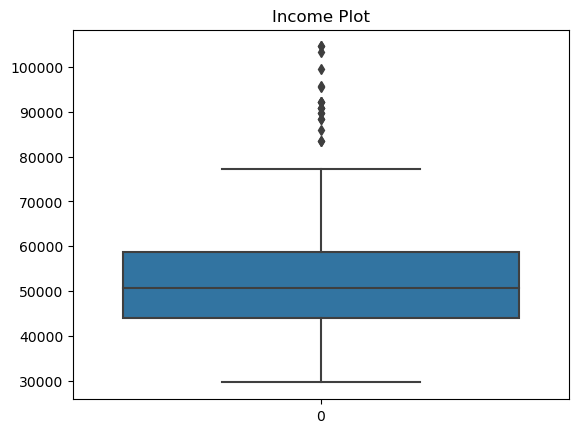

In [55]:
sns.boxplot(data = customers['Income'])
plt.title('Income Plot')
plt.show()

In [56]:
## Miles: The average number of miles the customer expects to walk/run each week

In [57]:
print('Minimum income: '+str(customers['Miles'].min())+ ' and Maximum income: '+str(customers['Miles'].max()))
print("Mean/Average: {}".format(customers['Miles'].mean()))
print("Median: {}".format(customers['Miles'].median()))
print("Mode: {}".format(customers['Miles'].mode().values[0]))
print("Standard Deviation: {}".format(customers['Miles'].std()))

Minimum income: 21 and Maximum income: 360
Mean/Average: 103.19444444444444
Median: 94.0
Mode: 85
Standard Deviation: 51.86360466180934


In [58]:
print('The first quantile: '+str(customers['Miles'].quantile(0.25)))
print('The second quantile: '+str(customers['Miles'].quantile(0.5)))
print('The third quantile: '+str(customers['Miles'].quantile(0.75)))

The first quantile: 66.0
The second quantile: 94.0
The third quantile: 114.75


In [59]:
q1_s= customers['Miles'].quantile(0.25)
q3_s= customers['Miles'].quantile(0.75)
iqr_s = q3_s-q1_s
print(f'The IQR value is {iqr_s}')

The IQR value is 48.75


In [60]:
q1_s-1.5*iqr_s, q3_s+1.5*iqr_s

(-7.125, 187.875)

In [61]:
customers[(customers['Miles']<(q1_s-1.5*iqr_s)) | (customers['Miles']>(q3_s+1.5*iqr_s)) ]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


In [62]:
len(customers[(customers['Miles']<(q1_s-1.5*iqr_s)) | (customers['Miles']>(q3_s+1.5*iqr_s)) ])

13

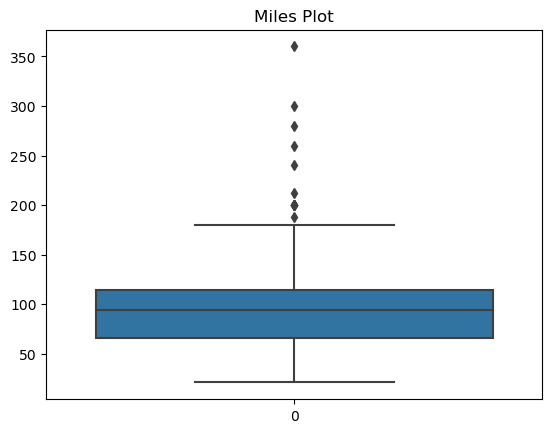

In [63]:
sns.boxplot(data = customers['Miles'])
plt.title('Miles Plot')
plt.show()

In [64]:
#c_age = customers[customers['Age'] == np.clip(customers['Age'], customers['Age'].quantile(0.05), customers['Age'].quantile(0.95))]

In [65]:
#c_age_edu = c_age[customers['Education'] == np.clip(customers['Education'], customers['Education'].quantile(0.05), customers['Education'].quantile(0.95))]

In [66]:
#c_age_edu_usage = c_age_edu[customers['Usage'] == np.clip(customers['Usage'], customers['Usage'].quantile(0.05), customers['Usage'].quantile(0.95))]

In [67]:
#c_age_edu_usage_fit = c_age_edu_usage[customers['Fitness'] == np.clip(customers['Fitness'], customers['Fitness'].quantile(0.05), customers['Fitness'].quantile(0.95))]

In [68]:
#c_age_edu_usage_fit_in = c_age_edu_usage_fit[customers['Income'] == np.clip(customers['Income'], customers['Income'].quantile(0.05), customers['Income'].quantile(0.95))]

In [69]:
#customers_5_to_95 = c_age_edu_usage_fit[customers['Miles'] == np.clip(customers['Miles'], customers['Miles'].quantile(0.05), customers['Miles'].quantile(0.95))].reset_index(drop = True)

In [70]:
#customers_5_to_95.head()

In [71]:
customers.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [72]:
## Product Sales Distribution:

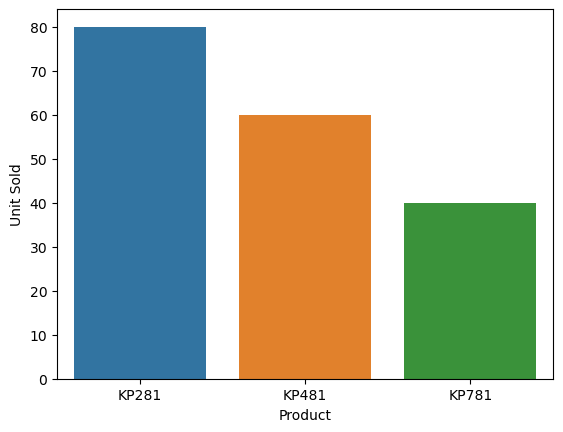

In [73]:
sns.countplot(data = customers, x = 'Product')
plt.ylabel('Unit Sold')
plt.show()

In [74]:
customers['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [75]:
sales = customers['Product'].value_counts().reset_index()

In [76]:
sales

,Product,count
0,KP281,80
1,KP481,60
2,KP781,40


In [77]:
def price(x):
    if x['Product'] == 'KP281':
        return x['count']*1500
    elif x['Product'] == 'KP481':
        return x['count']*1750
    else:
        return x['count']*2500

In [78]:
sales['Total Price'] = sales.apply(price, axis = 1)

In [79]:
sales

,Product,count,Total Price
0,KP281,80,120000
1,KP481,60,105000
2,KP781,40,100000


In [80]:
## Sales upon gender and marital status

Text(0, 0.5, 'Unit Sold')

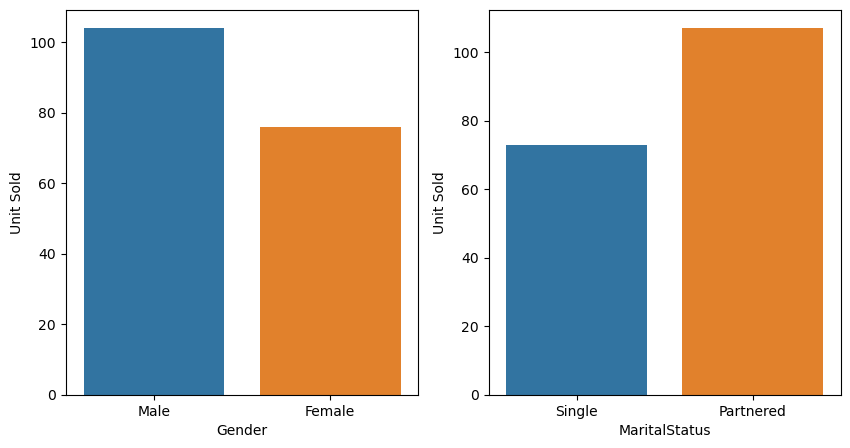

In [81]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(data = customers, x = 'Gender')
plt.ylabel('Unit Sold')

plt.subplot(1,2,2)
sns.countplot(data = customers, x = 'MaritalStatus')
plt.ylabel('Unit Sold')


In [82]:
customers['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [83]:
customers['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

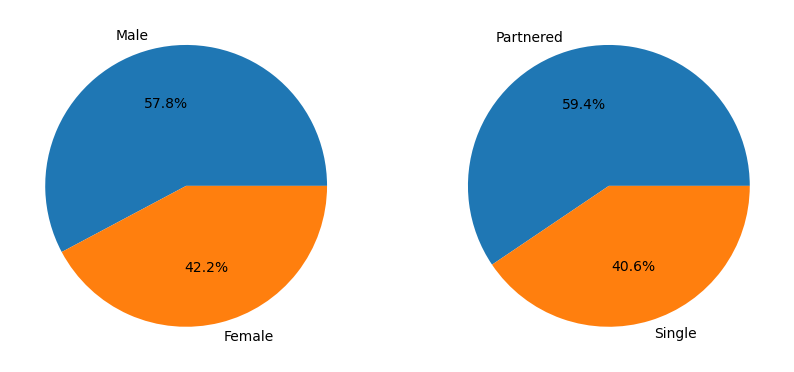

In [84]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.pie(customers['Gender'].value_counts().values,labels = customers['Gender'].value_counts().index, autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.pie(customers['MaritalStatus'].value_counts().values,labels = customers['MaritalStatus'].value_counts().index, autopct='%1.1f%%')

plt.show()

In [85]:
## Fitness and usage

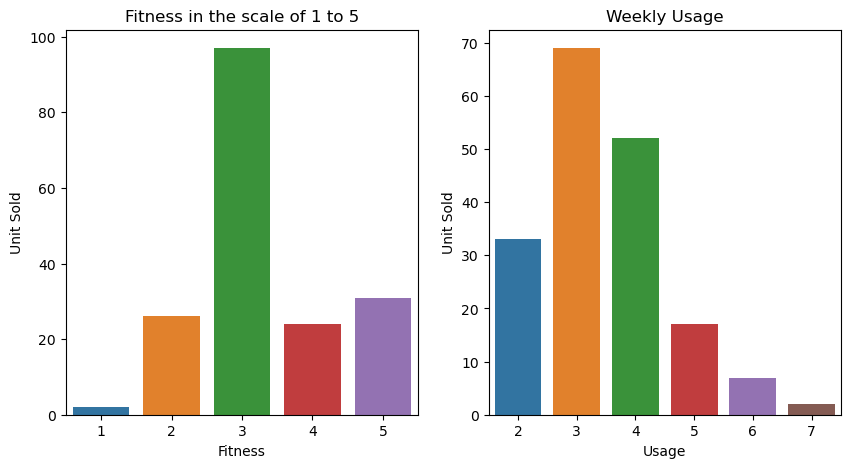

In [86]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(data = customers, x = 'Fitness')
plt.ylabel('Unit Sold')
plt.title('Fitness in the scale of 1 to 5')

plt.subplot(1,2,2)
sns.countplot(data = customers, x = 'Usage')
plt.ylabel('Unit Sold')
plt.title('Weekly Usage')

plt.show()

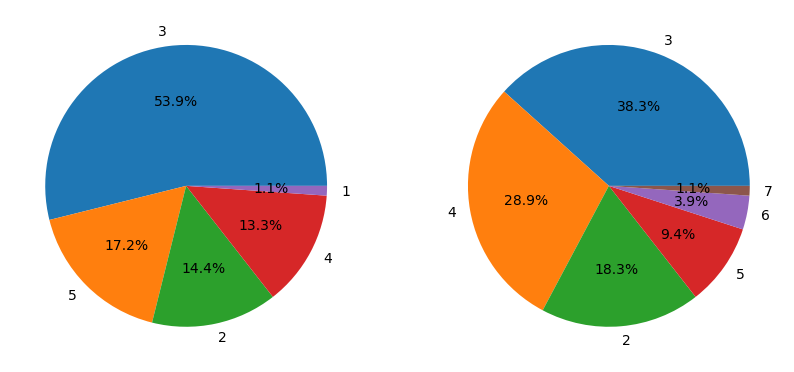

In [87]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.pie(customers['Fitness'].value_counts().values,labels = customers['Fitness'].value_counts().index, autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.pie(customers['Usage'].value_counts().values,labels = customers['Usage'].value_counts().index, autopct='%1.1f%%')

plt.show()

In [88]:
## Age distribution

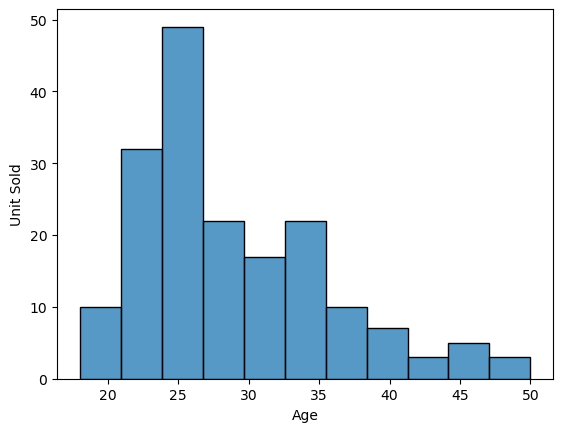

In [89]:
sns.histplot(data = customers, x = 'Age')
plt.ylabel('Unit Sold')
plt.show()

In [90]:
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

customers['Age_Group'] = pd.cut(customers['Age'],bins = bin_range1,labels = bin_labels1)

bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']

customers['Education_Group'] = pd.cut(customers['Education'],bins = bin_range2,labels = bin_labels2)

bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']

customers['Income_Group'] = pd.cut(customers['Income'],bins = bin_range3,labels = bin_labels3)

bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast']

customers['Miles_Group'] = pd.cut(customers['Miles'],bins = bin_range4,labels = bin_labels4)

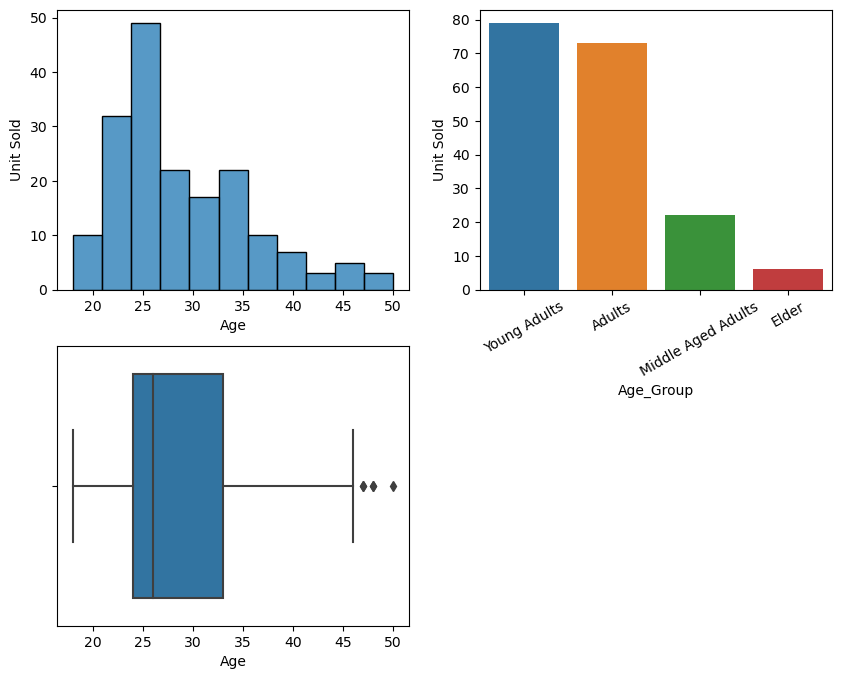

In [91]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.histplot(data = customers, x = 'Age')
plt.ylabel('Unit Sold')

plt.subplot(2,2,2)
sns.countplot(data = customers, x = 'Age_Group')
plt.ylabel('Unit Sold')
plt.xticks(rotation = 30)

plt.subplot(2,2,3)
sns.boxplot(data = customers, x = 'Age')

plt.show()

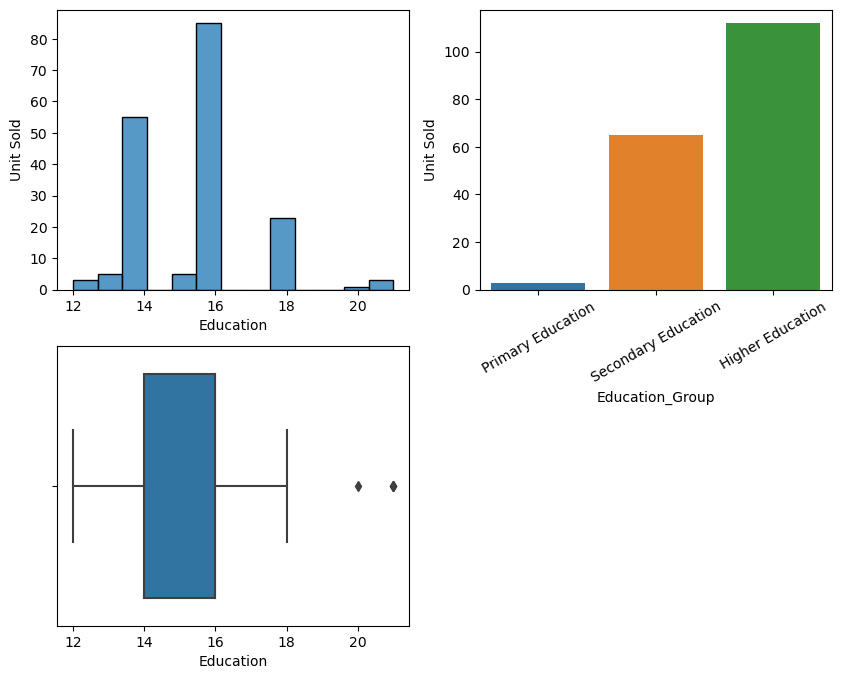

In [92]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.histplot(data = customers, x = 'Education')
plt.ylabel('Unit Sold')

plt.subplot(2,2,2)
sns.countplot(data = customers, x = 'Education_Group')
plt.ylabel('Unit Sold')
plt.xticks(rotation = 30)

plt.subplot(2,2,3)
sns.boxplot(data = customers, x = 'Education')

plt.show()

In [93]:
## Customer Income Distribution

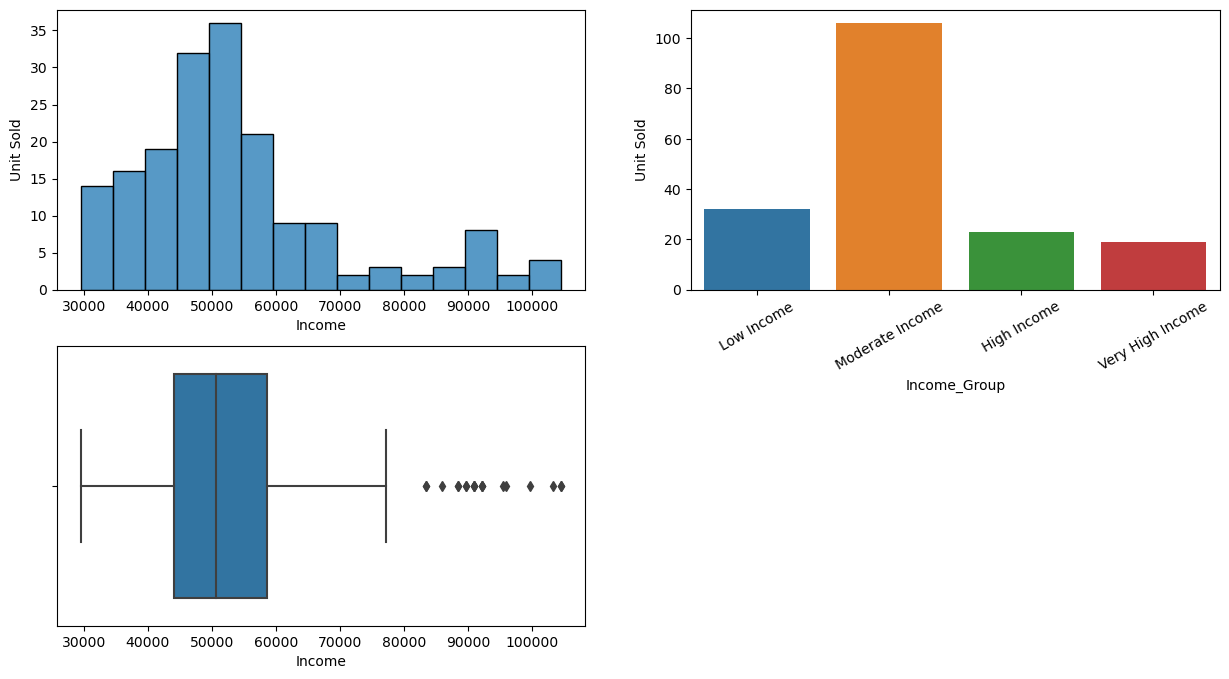

In [94]:
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
sns.histplot(data = customers, x = 'Income')
plt.ylabel('Unit Sold')

plt.subplot(2,2,2)
sns.countplot(data = customers, x = 'Income_Group')
plt.ylabel('Unit Sold')
plt.xticks(rotation = 30)
plt.subplot(2,2,3)
sns.boxplot(data = customers, x = 'Income')


plt.show()

In [95]:
## Customer weekly millage distribution

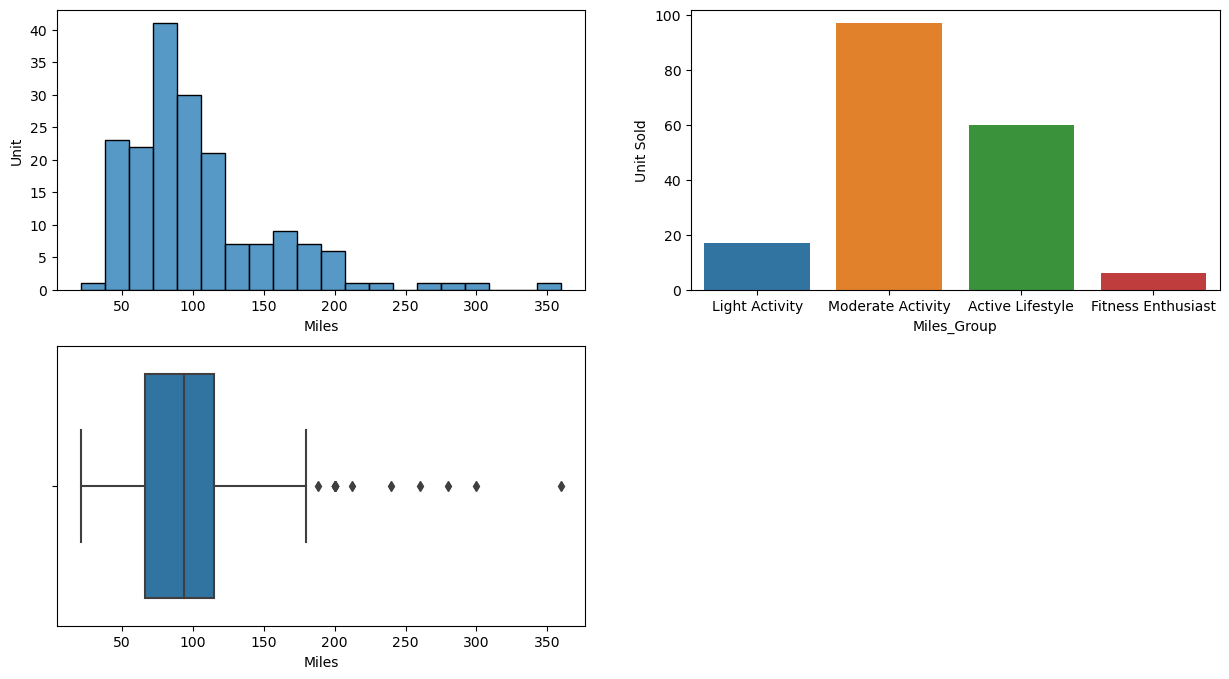

In [96]:
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
sns.histplot(data = customers, x = 'Miles')
plt.ylabel('Unit')

plt.subplot(2,2,2)
sns.countplot(data = customers, x = 'Miles_Group')
plt.ylabel('Unit Sold')

plt.subplot(2,2,3)
sns.boxplot(data = customers, x = 'Miles')

plt.show()

In [97]:
### Bivariate analysis

In [98]:
## Product vs numerical variables
customers.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Education_Group,Income_Group,Miles_Group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


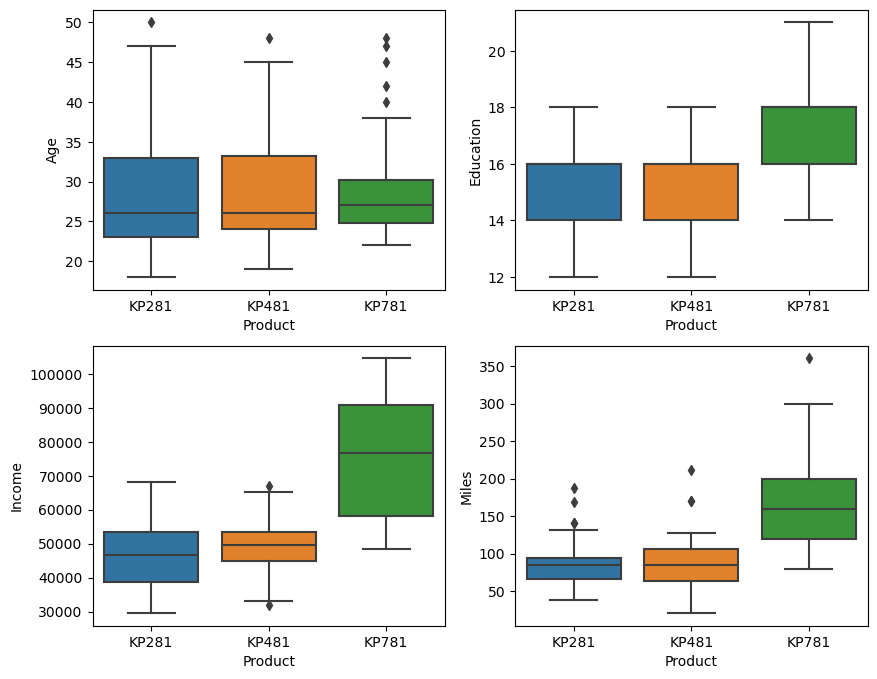

In [99]:
plt.figure(figsize = (10, 8))
plt.subplot(2,2,1)
sns.boxplot(data = customers, x= 'Product', y='Age')

plt.subplot(2,2,2)
sns.boxplot(data = customers, x= 'Product', y='Education')

plt.subplot(2,2,3)
sns.boxplot(data = customers, x= 'Product', y='Income')

plt.subplot(2,2,4)
sns.boxplot(data = customers, x= 'Product', y='Miles')

plt.show()

In [100]:
grp_p = customers.groupby('Product')
df = grp_p['Age_Group'].value_counts(normalize = True).reset_index()
df_new = df.pivot(index = 'Product', columns = 'Age_Group', values = 'proportion')
df_final = df_new.reset_index()

In [101]:
df_final

Age_Group,Product,Young Adults,Adults,Middle Aged Adults,Elder
0,KP281,0.425000,0.400,0.137500,0.037500
1,KP481,0.466667,0.400,0.116667,0.016667
2,KP781,0.425000,0.425,0.100000,0.050000


(array([0, 1, 2]),
 [Text(0, 0, 'KP281'), Text(1, 0, 'KP481'), Text(2, 0, 'KP781')])

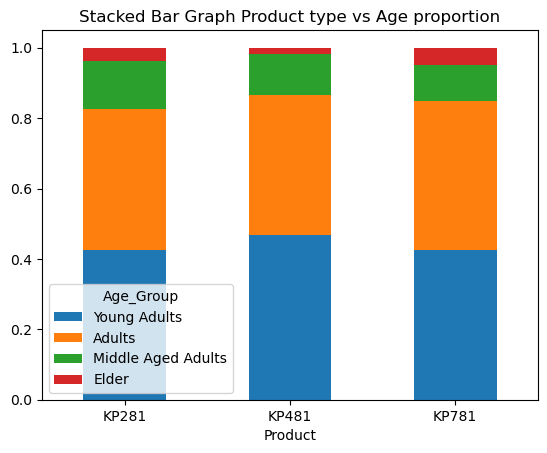

In [102]:
df_final.plot(x='Product', kind='bar', stacked=True,
        title='Stacked Bar Graph Product type vs Age proportion')
plt.xticks(rotation = 0)

In [103]:
grp_p = customers.groupby('Product')
df = grp_p['Education_Group'].value_counts(normalize = True).reset_index()
df_new = df.pivot(index = 'Product', columns = 'Education_Group', values = 'proportion')
df_final = df_new.reset_index()
df_final

Education_Group,Product,Primary Education,Secondary Education,Higher Education
0,KP281,0.025000,0.462500,0.5125
1,KP481,0.016667,0.433333,0.5500
2,KP781,0.000000,0.050000,0.9500


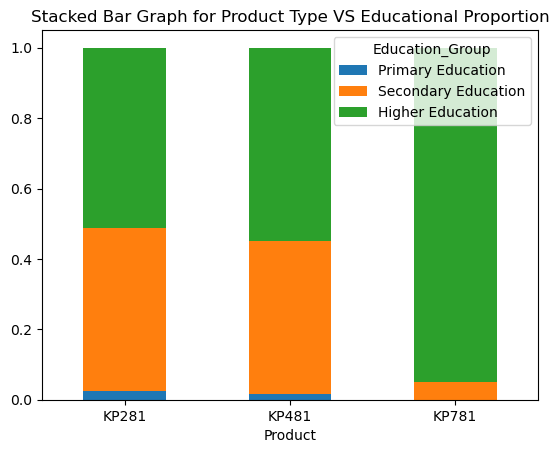

In [104]:
df_final.plot(x='Product', kind='bar', stacked=True,
        title='Stacked Bar Graph for Product Type VS Educational Proportion')
plt.xticks(rotation = 0)
plt.show()

In [105]:
## Product type vs income group

In [106]:
grp_p = customers.groupby('Product')
df = grp_p['Income_Group'].value_counts(normalize = True).reset_index()
df_new = df.pivot(index = 'Product', columns = 'Income_Group', values = 'proportion')
df_final = df_new.reset_index()
df_final

Income_Group,Product,Low Income,Moderate Income,High Income,Very High Income
0,KP281,0.2875,0.637500,0.075000,0.000
1,KP481,0.1500,0.733333,0.116667,0.000
2,KP781,0.0000,0.275000,0.250000,0.475


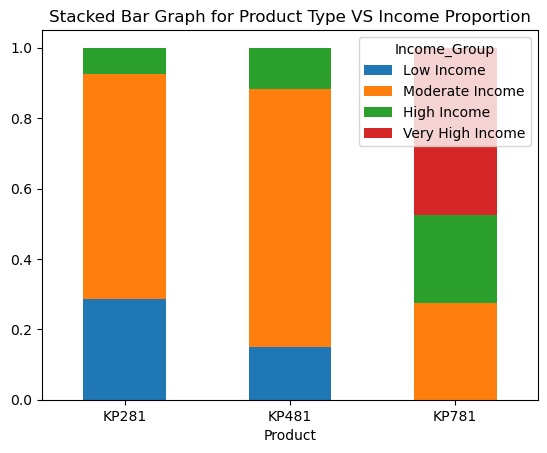

In [107]:
df_final.plot(x='Product', kind='bar', stacked=True,
        title='Stacked Bar Graph for Product Type VS Income Proportion')
plt.xticks(rotation = 0)
plt.show()

In [108]:
## Product type vs mileage
grp_p = customers.groupby('Product')
df = grp_p['Miles_Group'].value_counts(normalize = True).reset_index()
df_new = df.pivot(index = 'Product', columns = 'Miles_Group', values = 'proportion')
df_final = df_new.reset_index()
df_final

Miles_Group,Product,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast
0,KP281,0.150000,0.625,0.225,0.000000
1,KP481,0.083333,0.650,0.250,0.016667
2,KP781,0.000000,0.200,0.675,0.125000


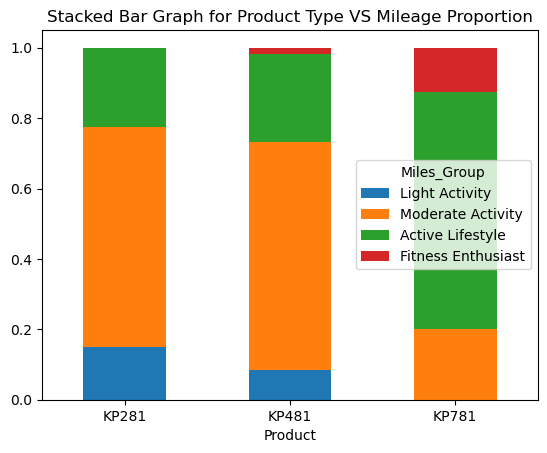

In [109]:
df_final.plot(x='Product', kind='bar', stacked=True,
        title='Stacked Bar Graph for Product Type VS Mileage Proportion')
plt.xticks(rotation = 0)
plt.show()

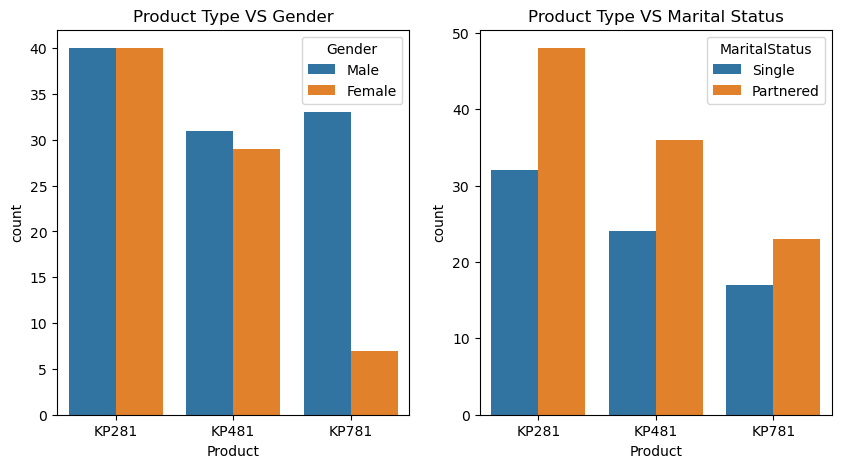

In [110]:
# Product type vs Gender and Marital Status
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.countplot(data = customers, x = 'Product', hue = 'Gender')
plt.title('Product Type VS Gender')

plt.subplot(1,2,2)
sns.countplot(data = customers, x = 'Product', hue = 'MaritalStatus')
plt.title('Product Type VS Marital Status')
plt.show()

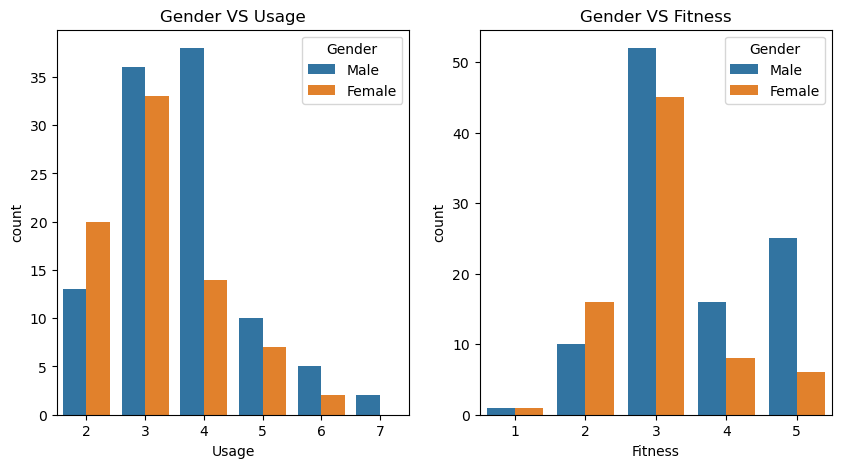

In [111]:
##Gender VS Product Usage and Gender VS Fitness
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.countplot(data = customers, x = 'Usage', hue = 'Gender')
plt.title('Gender VS Usage')

plt.subplot(1,2,2)
sns.countplot(data = customers, x = 'Fitness', hue = 'Gender')
plt.title('Gender VS Fitness')
plt.show()

In [112]:
## Probability
customers.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Education_Group,Income_Group,Miles_Group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


In [113]:
pd.crosstab(index = customers['Product'], columns = customers['Gender'], margins = True, normalize = True).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


In [114]:
## Probability of product purchase with respect to age
pd.crosstab(index = customers['Product'], columns = customers['Age_Group'], margins = True, normalize = True).round(2)

Age_Group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


In [115]:
## Probability of product purchase with respect to education
pd.crosstab(index = customers['Product'], columns = customers['Education_Group'], margins = True, normalize = True).round(2)

Education_Group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


In [116]:
## Probability of product purchase with respect to income
pd.crosstab(index = customers['Product'], columns = customers['Income_Group'], margins = True, normalize = True).round(2)

Income_Group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


In [117]:
## Probability of product purchase with respect to marital status
pd.crosstab(index = customers['Product'], columns = customers['MaritalStatus'], margins = True, normalize = True).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


In [118]:
## Probability of product purchase with respect to weekly usage
pd.crosstab(index = customers['Product'], columns = customers['Usage'], margins = True, normalize = True).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


In [119]:
# Probability of purchasing a product with respect to fitness
pd.crosstab(index = customers['Product'], columns = customers['Fitness'], margins = True, normalize = True).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


In [120]:
#Probability of purchasing a product with respect to weekly mileage
pd.crosstab(index = customers['Product'], columns = customers['Miles_Group'], margins = True, normalize = True).round(2)

Miles_Group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


In [121]:
## Correlation among different factors
df = customers
df['Fitness'] = df['Fitness'].astype('str')
df['Usage'] = df['Usage'].astype('str')

C:\Users\LIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


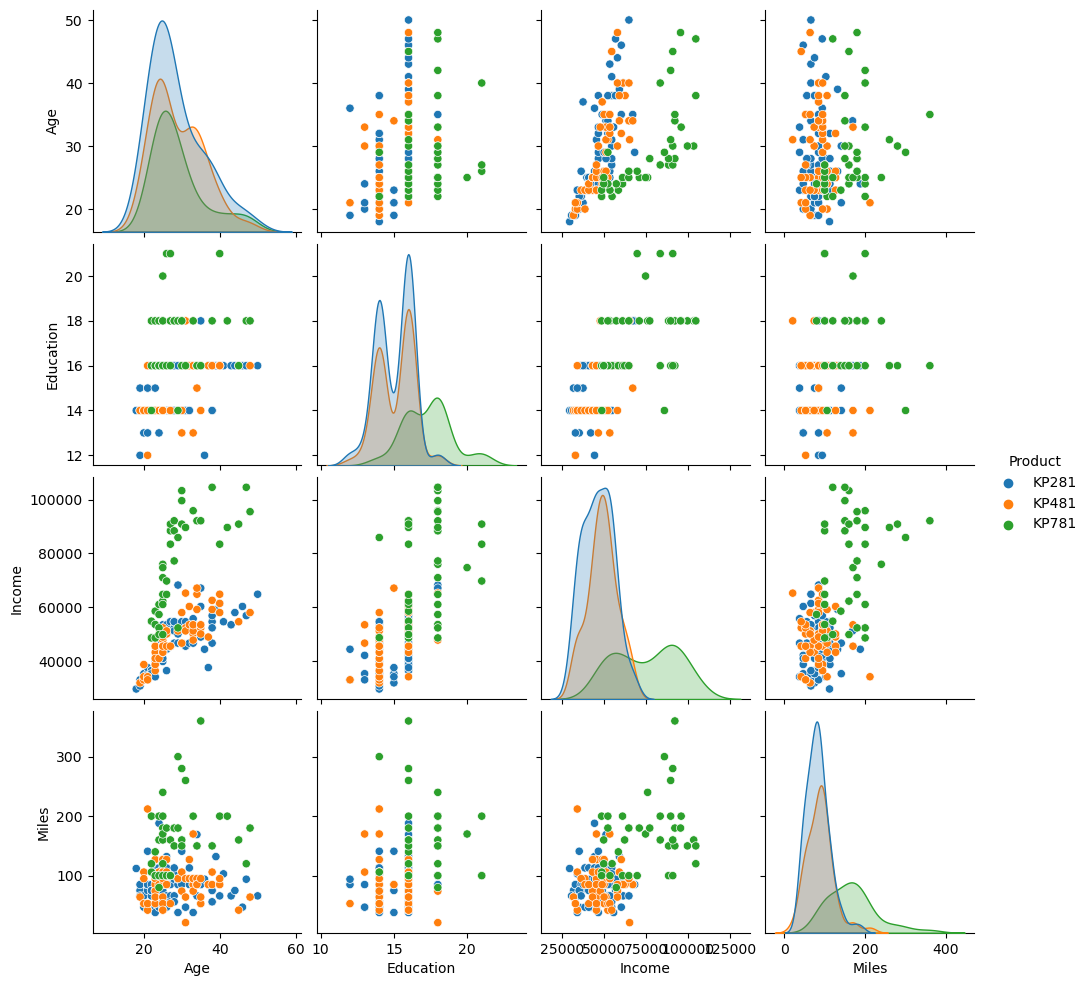

In [122]:
sns.pairplot(data = customers, hue = 'Product')
plt.show()

In [123]:
customers['Usage'] = customers['Usage'].astype('int64')
customers['Fitness'] = customers['Fitness'].astype('int64')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Product          180 non-null    object  
 1   Age              180 non-null    int64   
 2   Gender           180 non-null    object  
 3   Education        180 non-null    int64   
 4   MaritalStatus    180 non-null    object  
 5   Usage            180 non-null    int64   
 6   Fitness          180 non-null    int64   
 7   Income           180 non-null    int64   
 8   Miles            180 non-null    int64   
 9   Age_Group        180 non-null    category
 10  Education_Group  180 non-null    category
 11  Income_Group     180 non-null    category
 12  Miles_Group      180 non-null    category
dtypes: category(4), int64(6), object(3)
memory usage: 14.2+ KB


In [124]:
df = customers[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']]

In [125]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


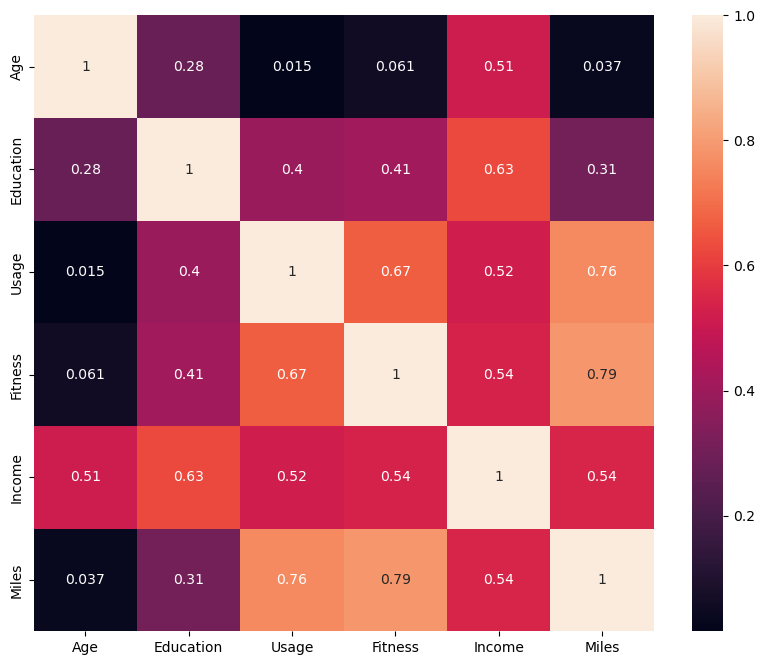

In [126]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()